# Задание 2.
Используя набор данных на листе «Training» (см. **Задания_1_2.xlsx**)   в качестве обучающей выборки, предсказать значения целевой переменной Target для набора данных на листе «Validate». Пояснить выбор метода. Привести оценки точности и качества предиктивной модели. Построить ROC-кривую. Назвать три наиболее важных предиктора.


In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Image, HTML
import numba
import seaborn as sns

%pylab inline
pylab.rcParams['figure.figsize'] = (18, 5)
pd.set_option('display.max_rows', 11)
pd.set_option('display.max_columns', 30)

Populating the interactive namespace from numpy and matplotlib


## Read training data

,Target,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20
Ind,,,,,,,,,,,,,,,,,,,,,
1,1,0.00,22,28,-0.580,0,0,0,0.300,24,1.010,30,21,0,10,0.399,1,24,0.800,2.400,248
2,0,0.00,21,0,9.562,0,0,0,0.462,24,12.546,26,30,13,4,0.689,0,8,0.923,0.000,107
3,0,2.29,20,0,0.447,1,0,5,0.163,3,0.491,30,27,0,0,0.406,0,0,0.800,0.000,1401
4,0,8.39,21,23,-2.678,0,0,1,0.600,18,6.443,30,18,6,9,0.652,1,0,0.767,2.556,18
5,1,7.00,22,21,-7.409,0,0,2,0.659,14,-7.122,18,23,4,21,0.723,0,0,1.333,0.857,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,1,5.00,23,1,1.558,0,0,1,0.637,11,0.462,30,28,4,0,0.677,0,0,0.800,1.000,221
9997,1,6.00,22,4,0.014,0,0,2,0.617,5,-0.365,30,27,3,6,0.795,0,0,0.800,0.667,429
9998,0,5.00,23,0,6.230,0,0,1,0.313,3,4.366,30,29,6,0,0.662,0,0,0.800,0.000,412


,Target,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9817.000000,10000.00000,10000.000000,9723.000000,9488.000000,10000.000000
mean,0.500000,14.941011,18.097100,15.074600,-4.536355,0.485100,0.003700,1.209000,0.428276,12.753300,-8.160087,27.565100,24.659900,13.650800,16.430700,0.505650,0.11540,1.542000,0.783979,1.023596,630.258100
std,0.500025,26.387400,7.105471,10.584216,21.537098,0.499803,0.060718,1.115188,0.270853,8.079491,21.726863,4.782243,7.092042,14.941405,10.835753,0.231351,0.31952,4.518371,0.324464,1.769253,964.770629
min,0.000000,0.000000,0.000000,0.000000,-386.955000,0.000000,0.000000,0.000000,0.031000,1.000000,-363.272000,1.000000,1.000000,0.000000,0.000000,0.042000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.895000,16.000000,3.000000,-8.647000,0.000000,0.000000,1.000000,0.194000,6.000000,-12.581500,27.000000,22.000000,5.000000,6.000000,0.314000,0.00000,0.000000,0.800000,0.400000,16.000000
50%,0.500000,10.000000,22.000000,18.000000,-1.056000,0.000000,0.000000,1.000000,0.360000,11.000000,-4.088500,30.000000,28.000000,10.000000,18.000000,0.574000,0.00000,0.000000,0.800000,0.800000,153.000000
75%,1.000000,20.000000,23.000000,24.000000,2.861500,1.000000,0.000000,2.000000,0.667000,22.000000,0.278500,30.000000,30.000000,17.000000,27.000000,0.705000,0.00000,0.000000,0.800000,1.000000,970.000000
max,1.000000,1500.000000,23.000000,28.000000,936.833000,1.000000,1.000000,17.000000,0.981000,24.000000,949.837000,30.000000,31.000000,300.000000,30.000000,0.923000,1.00000,24.000000,14.000000,24.000000,6996.000000


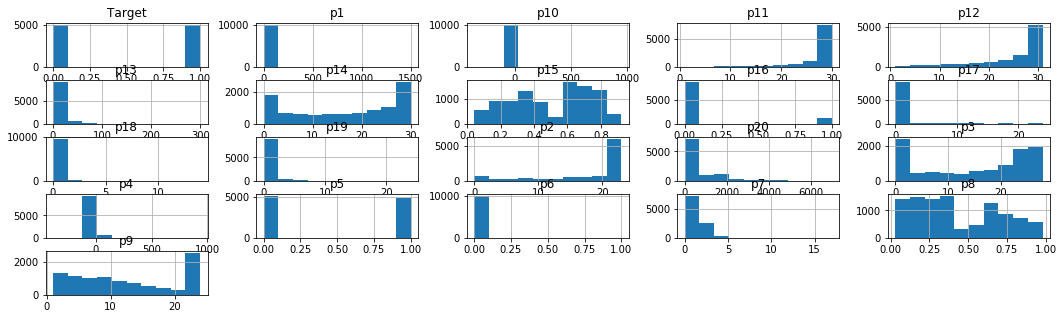

In [109]:
original_training_data = pd.read_excel('../inputs/Задания_1_2.xlsx', sheet_name='Training', index_col='Ind')
display(original_training_data)
display(original_training_data.describe())
original_training_data.hist();

- p1 - float, 0..1500, max-mean >> mean-min
- p2, p3, p7, p13, p14, p17, p20 - int, 0.., (..23, ..28, ..17, ..300, ..30, ..24, ..6996)
- p4, p10 - float, -/+
- p5, p6, p16 - int, 0/1, (mean ~0.5, ~0.004, ~0.11)
- p8, *p15* - float, 0..1
- p9, p11, p12 - int, >= 1, (..24, ..30, ..31)
- *p18*, *p19* - float, 0.., (..14, ..24), lots of 0.800?

There are gaps in data for p15, p18, p19 in the training set.

## Read data to predict

,Target,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20
Ind,,,,,,,,,,,,,,,,,,,,,
1,NaN,3.00,12,3,1.143,0,0,1,0.236,12,-1.854,30,23,4,12,0.448,0,0,0.800,0.250,429
2,NaN,7.00,12,10,1.949,1,0,1,0.630,15,-1.645,29,10,7,16,0.600,0,0,0.828,0.562,39
3,NaN,20.00,23,16,-13.124,0,0,1,0.271,21,-8.483,18,30,21,25,0.219,0,0,1.333,0.640,57
4,NaN,0.00,22,14,-16.258,0,0,0,0.406,24,1.335,30,26,21,3,0.573,0,0,NaN,4.667,787
5,NaN,109.56,23,24,-26.020,1,0,1,0.063,1,-112.806,30,30,69,30,0.075,0,0,0.800,0.800,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,NaN,4.71,22,19,-1.619,0,0,1,0.393,15,-1.461,29,19,2,14,0.652,1,0,0.724,1.357,15
4997,NaN,8.00,23,24,-22.418,1,0,1,0.365,21,-23.412,29,28,33,27,0.609,0,0,0.828,0.889,33
4998,NaN,0.00,13,0,4.826,0,0,0,0.539,24,2.632,30,12,5,0,0.591,0,2,0.800,0.000,288


,Target,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20
count,0.0,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,4910.000000,5000.000000,5000.000000,4845.000000,4755.000000,5000.000000
mean,NaN,16.289620,19.73280,12.683800,-4.565050,0.551000,0.00100,1.21960,0.339347,12.18300,-7.907650,28.296000,25.86420,14.798600,15.367800,0.425230,0.098400,1.220400,0.806808,0.905918,808.651600
std,NaN,26.979379,5.66673,10.090995,75.379567,0.497442,0.03161,1.03111,0.248153,7.81146,21.157392,4.059714,6.08243,16.920677,11.331187,0.222441,0.297885,4.013458,0.489396,1.580980,1069.311869
min,NaN,0.000000,0.00000,0.000000,-4952.961000,0.000000,0.00000,0.00000,0.030000,1.00000,-533.405000,0.000000,1.00000,0.000000,0.000000,0.041000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,4.355000,19.00000,0.000000,-7.970500,0.000000,0.00000,1.00000,0.140000,5.00000,-12.721750,29.000000,24.00000,6.000000,3.000000,0.237000,0.000000,0.000000,0.800000,0.000000,37.000000
50%,NaN,10.000000,23.00000,14.000000,-0.249500,1.000000,0.00000,1.00000,0.269000,11.00000,-3.584000,30.000000,29.00000,10.000000,17.000000,0.385000,0.000000,0.000000,0.800000,0.800000,285.000000
75%,NaN,20.000000,23.00000,24.000000,4.271750,1.000000,0.00000,2.00000,0.452000,20.00000,0.853250,30.000000,30.00000,18.000000,27.000000,0.631000,0.000000,0.000000,0.800000,0.950000,1413.000000
max,NaN,1000.000000,23.00000,28.000000,205.845000,1.000000,1.00000,12.00000,0.980000,24.00000,209.631000,30.000000,31.00000,309.000000,30.000000,0.918000,1.000000,24.000000,24.000000,24.000000,6495.000000


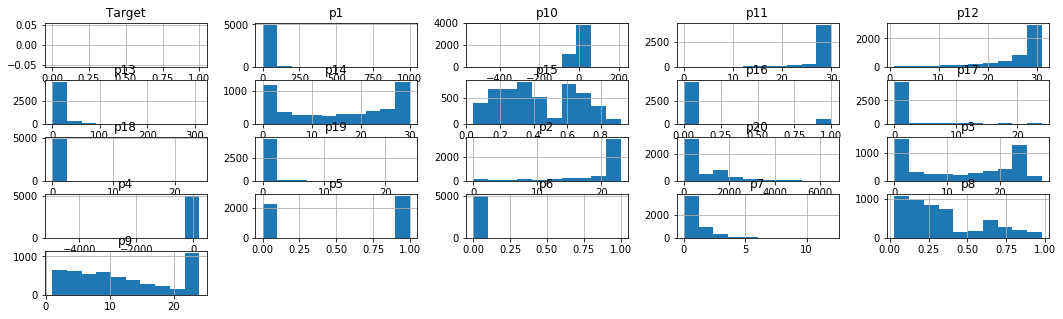

In [110]:
original_predict_data = pd.read_excel('../inputs/Задания_1_2.xlsx', sheet_name='Validate', index_col='Ind')
display(original_predict_data)
display(original_predict_data.describe())
original_predict_data.hist();

# Compare train and predict data sets

In [117]:
def compare_data_sets(train, predict):
    training_data_range = train.describe()
    predict_data_range = predict.describe()
    predict_min_in_range = predict_data_range.loc[['min']] >= training_data_range.loc[['min']]
    predict_max_in_range = predict_data_range.loc['max':'max'] <= training_data_range.loc['max':'max']
    training_data_range.rename(inplace=True, index=lambda row: 'train ' + row)
    predict_data_range.rename(inplace=True, index=lambda row: 'predict ' + row)
    predict_min_in_range.rename(inplace=True, index={'min': 'within range'})
    predict_max_in_range.rename(inplace=True, index={'max': 'within range'})
    predict_in_range = predict_min_in_range & predict_max_in_range
    predict_in_range.replace(inplace=True, to_replace=False, value=np.nan)

    data_ranges = pd.DataFrame(columns=predict.columns)
    data_ranges = data_ranges.append(training_data_range.loc['train min':'train min'])
    data_ranges = data_ranges.append(predict_data_range.loc['predict min':'predict min'])
    data_ranges = data_ranges.append(predict_in_range)
    data_ranges = data_ranges.append(predict_data_range.loc['predict max':'predict max'])
    data_ranges = data_ranges.append(training_data_range.loc['train max':'train max'])
    data_ranges = data_ranges.append(training_data_range.loc['train count':'train count'])
    data_ranges = data_ranges.append(predict_data_range.loc['predict count':'predict count'])
    data_ranges = data_ranges.append(training_data_range.loc['train mean':'train mean'])
    data_ranges = data_ranges.append(predict_data_range.loc['predict mean':'predict mean'])
    data_ranges = data_ranges.append(training_data_range.loc['train std':'train std'])
    data_ranges = data_ranges.append(predict_data_range.loc['predict std':'predict std'])
    display(data_ranges)

compare_data_sets(original_training_data, original_predict_data)

,Target,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20
train min,0.000000,0.000000,0.000000,0.000000,-386.955000,0.000000,0.000000,0.000000,0.031000,1.000000,-363.272000,1.000000,1.000000,0.000000,0.000000,0.042000,0.000000,0.000000,0.000000,0.000000,0.000000
predict min,NaN,0.000000,0.000000,0.000000,-4952.961000,0.000000,0.000000,0.000000,0.030000,1.000000,-533.405000,0.000000,1.000000,0.000000,0.000000,0.041000,0.000000,0.000000,0.000000,0.000000,0.000000
within range,NaN,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,NaN,1.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000
predict max,NaN,1000.000000,23.000000,28.000000,205.845000,1.000000,1.000000,12.000000,0.980000,24.000000,209.631000,30.000000,31.000000,309.000000,30.000000,0.918000,1.000000,24.000000,24.000000,24.000000,6495.000000
train max,1.000000,1500.000000,23.000000,28.000000,936.833000,1.000000,1.000000,17.000000,0.981000,24.000000,949.837000,30.000000,31.000000,300.000000,30.000000,0.923000,1.000000,24.000000,14.000000,24.000000,6996.000000
train count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9817.000000,10000.000000,10000.000000,9723.000000,9488.000000,10000.000000
predict count,0.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4910.000000,5000.000000,5000.000000,4845.000000,4755.000000,5000.000000
train mean,0.500000,14.941011,18.097100,15.074600,-4.536355,0.485100,0.003700,1.209000,0.428276,12.753300,-8.160087,27.565100,24.659900,13.650800,16.430700,0.505650,0.115400,1.542000,0.783979,1.023596,630.258100
predict mean,NaN,16.289620,19.732800,12.683800,-4.565050,0.551000,0.001000,1.219600,0.339347,12.183000,-7.907650,28.296000,25.864200,14.798600,15.367800,0.425230,0.098400,1.220400,0.806808,0.905918,808.651600
train std,0.500025,26.387400,7.105471,10.584216,21.537098,0.499803,0.060718,1.115188,0.270853,8.079491,21.726863,4.782243,7.092042,14.941405,10.835753,0.231351,0.319520,4.518371,0.324464,1.769253,964.770629


some values in the training set have ranges more narrow than in the prediction set
- p13 - train 0..300, validate 0..309
- p4 - train -387..937, validate -4952..205
- p10 - train -363..949, validate -533..209
- p18 - train 0..14, validate 0..24

# Don't know how to handle nans, let's try without them first

In [114]:
training_data_droppedna = original_training_data.dropna()
training_data_droppedna

,Target,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20
Ind,,,,,,,,,,,,,,,,,,,,,
1,1,0.00,22,28,-0.580,0,0,0,0.300,24,1.010,30,21,0,10,0.399,1,24,0.800,2.400,248
2,0,0.00,21,0,9.562,0,0,0,0.462,24,12.546,26,30,13,4,0.689,0,8,0.923,0.000,107
3,0,2.29,20,0,0.447,1,0,5,0.163,3,0.491,30,27,0,0,0.406,0,0,0.800,0.000,1401
4,0,8.39,21,23,-2.678,0,0,1,0.600,18,6.443,30,18,6,9,0.652,1,0,0.767,2.556,18
5,1,7.00,22,21,-7.409,0,0,2,0.659,14,-7.122,18,23,4,21,0.723,0,0,1.333,0.857,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,1,5.00,23,1,1.558,0,0,1,0.637,11,0.462,30,28,4,0,0.677,0,0,0.800,1.000,221
9997,1,6.00,22,4,0.014,0,0,2,0.617,5,-0.365,30,27,3,6,0.795,0,0,0.800,0.667,429
9998,0,5.00,23,0,6.230,0,0,1,0.313,3,4.366,30,29,6,0,0.662,0,0,0.800,0.000,412
